# Importing dependencies

In [166]:
import pandas as pd
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt


# Importing dataset and performing some analysis

In [69]:
loan_prediction_dataset = pd.read_csv("loan prediction.csv")

In [70]:
# printing the first 5 rows
loan_prediction_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [71]:
# printing the last 5 rows
loan_prediction_dataset.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [72]:
# printing rows and columns
loan_prediction_dataset.shape

(614, 13)

In [73]:
# printing statistics of the dataset
loan_prediction_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [74]:
# Checking for null values
loan_prediction_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Label Encoding

In [115]:
# changing categorical values to mumerical for the model
loan_prediction_dataset.replace({'Married': {'No':0, 'Yes':1}, 'Gender': {'Male':1, 'Female':0}, 
                                 'Self_Employed': {'No': 0, 'Yes':1} , 'Property_Area': {'Rural':0 , 'Semiurban':1, 'Urban': 3}
                                 , 'Education': {'Graduate':1, 'Not Graduate':0}, 'Loan_Status': {'N':0,'Y':1}}, inplace = True)



In [117]:
loan_prediction_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0,5849,0.0,146.412162,360.0,1.0,3,1
1,LP001003,1.0,1.0,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1.0,1.0,0,1,1,3000,0.0,66.000000,360.0,1.0,3,1
3,LP001006,1.0,1.0,0,0,0,2583,2358.0,120.000000,360.0,1.0,3,1
4,LP001008,1.0,0.0,0,1,0,6000,0.0,141.000000,360.0,1.0,3,1


In [118]:
loan_prediction_dataset['Dependents'].value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

In [119]:
loan_prediction_dataset.replace(to_replace = '3+' , value = 4, inplace =True)
loan_prediction_dataset.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,0.0,0.0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1.0,1.0,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1.0,1.0,1,1,0,8072,240.0,253.0,360.0,1.0,3,1
612,LP002984,1.0,1.0,2,1,0,7583,0.0,187.0,360.0,1.0,3,1
613,LP002990,0.0,0.0,0,1,1,4583,0.0,133.0,360.0,0.0,1,0


# Imputing null values

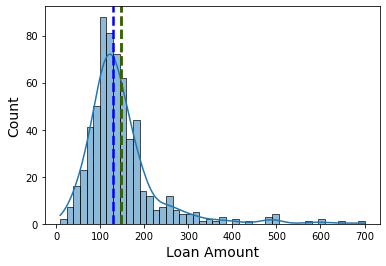

In [167]:
sns.histplot(loan_prediction_dataset.LoanAmount, kde = True);
plt.xlabel("Loan Amount", size=14)
plt.ylabel("Count", size=14)
plt.axvline(x=loan_prediction_dataset.LoanAmount.median(),
            color='blue',
            ls='--', 
            lw=2.5)
plt.axvline(x=loan_prediction_dataset.LoanAmount.mean(),
            color='red',
            ls='--', 
            lw=2.5)
plt.axvline(x=loan_prediction_dataset.LoanAmount.mode().values[0],
            color='green',
            ls='--', 
            lw=2.5)


### Loan Amount is skewed to the left and thus, ideally, we should use mode or median to replace null values. Also, here mean and mode is equal so we can go ahead and use mean.

In [121]:
#Replacing null values in loan amount 
loan_prediction_dataset['LoanAmount'].fillna(loan_prediction_dataset['LoanAmount'].mean(), inplace = True)
loan_prediction_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0,5849,0.0,146.412162,360.0,1.0,3,1
1,LP001003,1.0,1.0,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1.0,1.0,0,1,1,3000,0.0,66.000000,360.0,1.0,3,1
3,LP001006,1.0,1.0,0,0,0,2583,2358.0,120.000000,360.0,1.0,3,1
4,LP001008,1.0,0.0,0,1,0,6000,0.0,141.000000,360.0,1.0,3,1


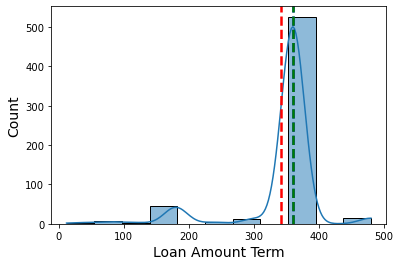

In [122]:
sns.histplot(loan_prediction_dataset.Loan_Amount_Term, kde = True);
plt.xlabel("Loan Amount Term", size=14)
plt.ylabel("Count", size=14)
plt.axvline(x=loan_prediction_dataset.Loan_Amount_Term.median(),
            color='blue',
            ls='--', 
            lw=2.5)
plt.axvline(x=loan_prediction_dataset.Loan_Amount_Term.mean(),
            color='red',
            ls='--', 
            lw=2.5)
plt.axvline(x=loan_prediction_dataset.Loan_Amount_Term.mode().values[0],
            color='green',
            ls='--', 
            lw=2.5)

### From the histogram, it is evident that one of the values appears almost everytime in the columns. Thus, it would be better to take mode to replace null values.

In [123]:
# replacing null values in loan amount term
loan_prediction_dataset['Loan_Amount_Term'].fillna(load_prediction_dataset['Loan_Amount_Term'].mode()[0], inplace = True)
loan_prediction_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0,5849,0.0,146.412162,360.0,1.0,3,1
1,LP001003,1.0,1.0,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1.0,1.0,0,1,1,3000,0.0,66.000000,360.0,1.0,3,1
3,LP001006,1.0,1.0,0,0,0,2583,2358.0,120.000000,360.0,1.0,3,1
4,LP001008,1.0,0.0,0,1,0,6000,0.0,141.000000,360.0,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0,1,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1.0,1.0,4,1,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1.0,1.0,1,1,0,8072,240.0,253.000000,360.0,1.0,3,1
612,LP002984,1.0,1.0,2,1,0,7583,0.0,187.000000,360.0,1.0,3,1


### For the other columns with null values, we can just use mode as there are only 2 values in them.

In [124]:
loan_prediction_dataset['Gender'].fillna(load_prediction_dataset['Gender'].mode()[0], inplace = True)
loan_prediction_dataset['Married'].fillna(load_prediction_dataset['Married'].mode()[0], inplace = True)
loan_prediction_dataset['Dependents'].fillna(load_prediction_dataset['Dependents'].mode()[0], inplace = True)
loan_prediction_dataset['Self_Employed'].fillna(load_prediction_dataset['Self_Employed'].mode()[0], inplace = True)
loan_prediction_dataset['Credit_History'].fillna(load_prediction_dataset['Credit_History'].mode()[0], inplace = True)
loan_prediction_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0,5849,0.0,146.412162,360.0,1.0,3,1
1,LP001003,1.0,1.0,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1.0,1.0,0,1,1,3000,0.0,66.000000,360.0,1.0,3,1
3,LP001006,1.0,1.0,0,0,0,2583,2358.0,120.000000,360.0,1.0,3,1
4,LP001008,1.0,0.0,0,1,0,6000,0.0,141.000000,360.0,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0,1,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1.0,1.0,4,1,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1.0,1.0,1,1,0,8072,240.0,253.000000,360.0,1.0,3,1
612,LP002984,1.0,1.0,2,1,0,7583,0.0,187.000000,360.0,1.0,3,1


In [125]:
# Checking for null values again
loan_prediction_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Data Visulaization


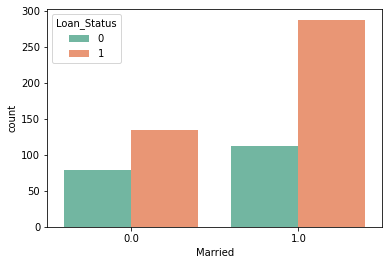

In [126]:
sns.countplot(x = 'Married', hue = 'Loan_Status', data = loan_prediction_dataset, palette = 'Set2');

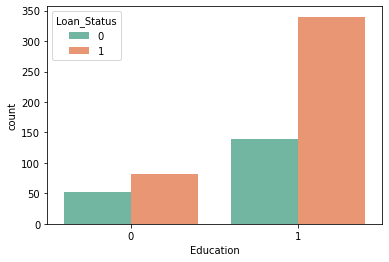

In [127]:
sns.countplot(x = 'Education', hue = 'Loan_Status', data = loan_prediction_dataset, palette = 'Set2');

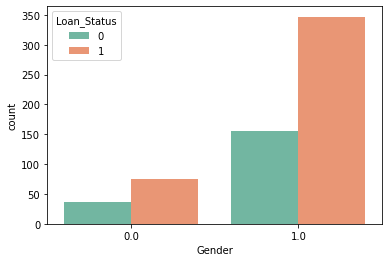

In [138]:
sns.countplot(x = 'Gender', hue = 'Loan_Status', data = loan_prediction_dataset, palette = 'Set2');

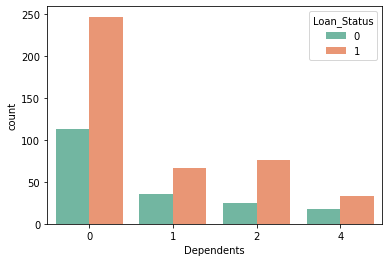

In [139]:
sns.countplot(x = 'Dependents', hue = 'Loan_Status', data = loan_prediction_dataset, palette = 'Set2');

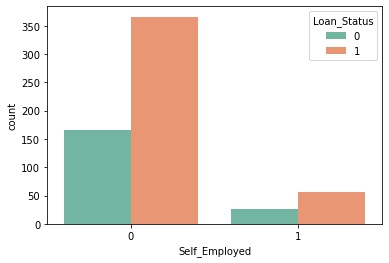

In [140]:
sns.countplot(x = 'Self_Employed', hue = 'Loan_Status', data = loan_prediction_dataset, palette = 'Set2');

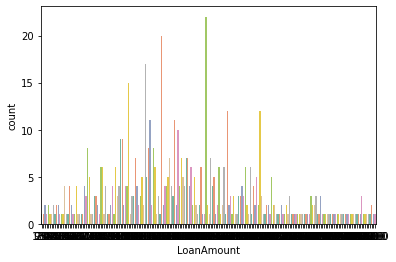

In [146]:
sns.countplot(x = 'LoanAmount', data = loan_prediction_dataset, palette = 'Set2');

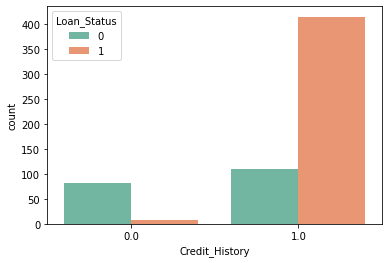

In [147]:
sns.countplot(x = 'Credit_History', hue = 'Loan_Status', data = loan_prediction_dataset, palette = 'Set2');

# Splitting data into features and target values


In [128]:
X = loan_prediction_dataset.drop(columns = ['Loan_ID', 'Loan_Status'], axis  = 1)
Y = loan_prediction_dataset['Loan_Status']

# Splitting features and target values for training and testing 

In [129]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2, stratify = Y)

# SVM Model fitting

In [130]:
model = svm.SVC(kernel = 'linear')

In [131]:
model.fit(X_train, Y_train)

SVC(kernel='linear')

# Checking accuracy for SVM

In [136]:
X_train_predict = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_predict)
print("Predicted values are: ",X_train_predict)
print(f"Training data accuracy is : {round(training_data_accuracy*100,2)}%")

Predicted values are:  [1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0
 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1

In [154]:
X_test_predict = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_predict)
print("Predicted values are: ",X_test_predict)
print(f"Test data accuracy is : {round(test_data_accuracy*100,2)}%")

Predicted values are:  [1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1]
Test data accuracy is : 81.3%


# KNN model fitting

In [158]:
KNNclassifier = KNeighborsClassifier()
KNNclassifier.fit(X_train, Y_train)

KNeighborsClassifier()

# Checking accuracy for KNN

In [160]:
X_train_KNN = KNNclassifier.predict(X_train)
training_data_accuracy_knn = accuracy_score(Y_train, X_train_KNN)
print("Predictied values are: ", X_train_KNN)
print(f"Training data accuracy is : {round(training_data_accuracy_knn*100,2)}%")

Predictied values are:  [1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1
 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1
 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1
 

In [161]:
X_test_KNN = KNNclassifier.predict(X_test)
test_data_accuracy_knn = accuracy_score(Y_test, X_test_KNN)
print("Predictied values are: ", X_test_KNN)
print(f"Test data accuracy is : {round(test_data_accuracy_knn*100,2)}%")

Predictied values are:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1
 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1
 0 1 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0
 1 1 0 1 0 1 0 1 0 1 1 1]
Test data accuracy is : 60.16%


### As we can see from accuracy score that SVM classifier is a better model with higher accuracy and so we will use it to make a predictive system

In [164]:
import numpy as np
# predictive system
input = (1.0,0.0,0,1,0,5849,0.0,146.412162,360.0,1.0,3)

# converting input to a numpy array
input_as_numpy_array = np.asarray(input)

#reshaping array as it is only one instance
reshaped_array = input_as_numpy_array.reshape(1,-1)

#prediction
predicted_values = model.predict(reshaped_array)

print(predicted_values)

if (predicted_values==1):
    print("Loan approved")
    
else:
    print("Loan rejected")

[1]
Loan approved


D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
